In [60]:
import pandas as pd
df = pd.read_csv('C:\\Users\\Kamal\\Downloads\\final_translation.csv')
df.columns = ['English','Tamil']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11104 entries, 0 to 11103
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   English  11104 non-null  object
 1   Tamil    11104 non-null  object
dtypes: object(2)
memory usage: 173.6+ KB


In [61]:
import re

def clean_text(text):
    # Keep only Tamil/English letters and numbers, remove all other characters
    return re.sub(r'[^a-zA-Z0-9\u0B80-\u0BFF\s]', '', text)

# Apply cleaning function to English and Tamil columns
df['English'] = df['English'].apply(clean_text)  # Clean English column
df['Tamil'] = df['Tamil'].apply(clean_text)  # Clean Tamil column

df

,English,Tamil
0,Lets try something,ஏதாவது முயற்சி செய்யலாம்
1,I have to go to sleep,நான் தூங்க செல்ல வேண்டும்
2,Today is June 18th and it is Muiriels birthday,இன்று ஜூன் 18 மற்றும் முரியலின் பிறந்த நாள்
3,Muiriel is 20 now,முரியலுக்கு இப்போது 20 வயது
4,The password is Muiriel,கடவுச்சொல் முரியல்
...,...,...
11099,Dont speak to the driver while he is driving,வாகனம் ஓட்டும் போது ஓட்டுனரிடம் பேச வேண்டாம்
11100,The driver was inattentive and could not stop ...,டிரைவர் கவனக்குறைவாக இருந்ததால் சரியான நேரத்தி...
11101,The driver could not distinguish the signal in...,டிரைவரால் மூடுபனியில் சிக்னலை வேறுபடுத்திப் பா...
11102,The driver tipped his cap,டிரைவர் தொப்பியை சாய்த்தார்


In [62]:
# Define a function to check if any English character is present in the Tamil text
def contains_english(text):
    # This regex checks if the text contains any character from the English alphabet
    return bool(re.search(r'[a-zA-Z]', text))

# Apply the function to filter out rows where Tamil contains English words
df = df[~df['Tamil'].apply(contains_english)]
df

,English,Tamil
0,Lets try something,ஏதாவது முயற்சி செய்யலாம்
1,I have to go to sleep,நான் தூங்க செல்ல வேண்டும்
2,Today is June 18th and it is Muiriels birthday,இன்று ஜூன் 18 மற்றும் முரியலின் பிறந்த நாள்
3,Muiriel is 20 now,முரியலுக்கு இப்போது 20 வயது
4,The password is Muiriel,கடவுச்சொல் முரியல்
...,...,...
11099,Dont speak to the driver while he is driving,வாகனம் ஓட்டும் போது ஓட்டுனரிடம் பேச வேண்டாம்
11100,The driver was inattentive and could not stop ...,டிரைவர் கவனக்குறைவாக இருந்ததால் சரியான நேரத்தி...
11101,The driver could not distinguish the signal in...,டிரைவரால் மூடுபனியில் சிக்னலை வேறுபடுத்திப் பா...
11102,The driver tipped his cap,டிரைவர் தொப்பியை சாய்த்தார்


In [63]:
import pandas as pd

# Define the WordLevelTokenizer class (use the class from the previous answer)
class WordLevelTokenizer:
    def __init__(self, special_tokens=None):
        self.word_to_id = {}
        self.id_to_word = {}
        self.special_tokens = special_tokens or []
        self.build_vocab(self.special_tokens)

    def build_vocab(self, tokens):
        for token in tokens:
            self.add_token(token)

    def add_token(self, token):
        if token not in self.word_to_id:
            idx = len(self.word_to_id)
            self.word_to_id[token] = idx
            self.id_to_word[idx] = token

    def tokenize(self, text):
        return text.split()

    def encode(self, text):
        tokens = self.tokenize(text)
        return [self.word_to_id.get(token, self.word_to_id.get("<UNK>")) for token in tokens]

    def decode(self, token_ids):
        return " ".join(self.id_to_word.get(idx, "<UNK>") for idx in token_ids)

    def fit_on_texts(self, texts):
        for text in texts:
            tokens = self.tokenize(text)
            self.build_vocab(tokens)

    def vocab_size(self):
        return len(self.word_to_id)

In [64]:
# Initialize tokenizer with special tokens
special_tokens = ["<UNK>", "<PAD>", "<SOS>", "<EOS>"]
tamil_tokenizer = WordLevelTokenizer(special_tokens=special_tokens)
english_tokenizer = WordLevelTokenizer(special_tokens=special_tokens)

In [65]:
# Fit tokenizer on the 'text' column
tamil_tokenizer.fit_on_texts(df['Tamil'])
print("Vocabulary:", len(tamil_tokenizer.word_to_id))

Vocabulary: 15529


In [66]:
english_tokenizer.fit_on_texts(df['English'])
print("Vocabulary:", len(english_tokenizer.word_to_id))

Vocabulary: 8100


In [67]:
# Tokenize the Tamil text in your dataframe
df['Tokenized_Tamil'] = df['Tamil'].apply(lambda x: tamil_tokenizer.encode(x))
df['Tokenized_English'] = df['English'].apply(lambda x: english_tokenizer.encode(x))
# Print the dataframe with tokenized Tamil text
df

,English,Tamil,Tokenized_Tamil,Tokenized_English
0,Lets try something,ஏதாவது முயற்சி செய்யலாம்,"[4, 5, 6]","[4, 5, 6]"
1,I have to go to sleep,நான் தூங்க செல்ல வேண்டும்,"[7, 8, 9, 10]","[7, 8, 9, 10, 9, 11]"
2,Today is June 18th and it is Muiriels birthday,இன்று ஜூன் 18 மற்றும் முரியலின் பிறந்த நாள்,"[11, 12, 13, 14, 15, 16, 17]","[12, 13, 14, 15, 16, 17, 13, 18, 19]"
3,Muiriel is 20 now,முரியலுக்கு இப்போது 20 வயது,"[18, 19, 20, 21]","[20, 13, 21, 22]"
4,The password is Muiriel,கடவுச்சொல் முரியல்,"[22, 23]","[23, 24, 13, 20]"
...,...,...,...,...
11099,Dont speak to the driver while he is driving,வாகனம் ஓட்டும் போது ஓட்டுனரிடம் பேச வேண்டாம்,"[3724, 15517, 741, 15520, 1215, 797]","[487, 491, 9, 50, 7118, 481, 89, 13, 1678]"
11100,The driver was inattentive and could not stop ...,டிரைவர் கவனக்குறைவாக இருந்ததால் சரியான நேரத்தி...,"[15521, 3850, 751, 465, 2632, 2354, 2246]","[23, 7118, 45, 8096, 16, 149, 96, 2074, 49, 56]"
11101,The driver could not distinguish the signal in...,டிரைவரால் மூடுபனியில் சிக்னலை வேறுபடுத்திப் பா...,"[15522, 15523, 15524, 3612, 502, 2246]","[23, 7118, 149, 96, 2531, 50, 8097, 49, 50, 3566]"
11102,The driver tipped his cap,டிரைவர் தொப்பியை சாய்த்தார்,"[15521, 15525, 15526]","[23, 7118, 8098, 886, 6047]"


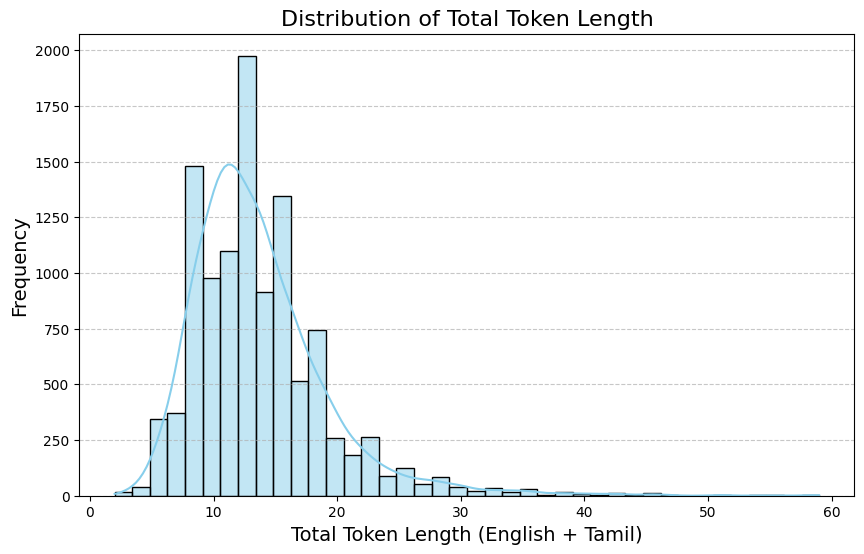

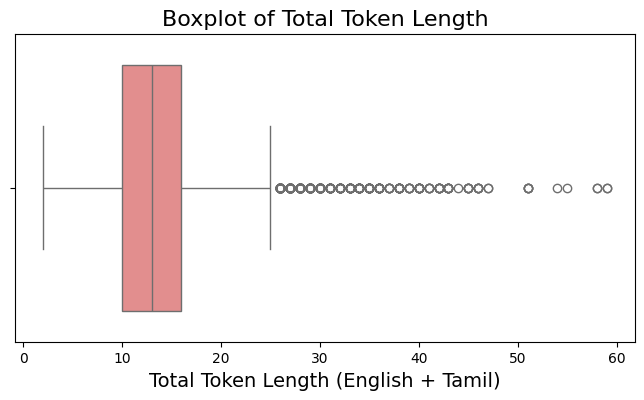

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of total token length using a histogram
plt.figure(figsize=(10, 6))
sns.histplot(df_sorted["total_token_length"], bins=40, kde=True, color="skyblue")
plt.title("Distribution of Total Token Length", fontsize=16)
plt.xlabel("Total Token Length (English + Tamil)", fontsize=14)
plt.ylabel("Frequency", fontsize=14)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Optional: Boxplot for a quick summary of the distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x=df_sorted["total_token_length"], color="lightcoral")
plt.title("Boxplot of Total Token Length", fontsize=16)
plt.xlabel("Total Token Length (English + Tamil)", fontsize=14)
plt.show()


In [68]:
z = 0
t = 0
for i in df['Tokenized_Tamil']:
    for j in i:
        t = t +1
        if j == 0:
           z=z+1
print(z)
print(t)

0
61925


In [69]:
tamil_idx = []
for idx , i in enumerate(df['Tokenized_Tamil']):
    if len(i) > 24:
        tamil_idx.append(idx)

print(len(tamil_idx))

df.shape

3


(11076, 4)

In [70]:
df = df.drop(index=df.index[tamil_idx])

df = df.reset_index(drop=True)

df.shape

(11073, 4)

In [71]:

english_idx = []
for idx , i in enumerate(df['Tokenized_English']):
    if len(i) > 24:
        english_idx.append(idx)

print(len(english_idx))

df.shape

36


(11073, 4)

In [72]:
df = df.drop(index=df.index[english_idx])

df = df.reset_index(drop=True)

df.shape

(11037, 4)

In [73]:
import numpy as np

# Example of the maximum padding length
max_pad = 24
cls_token = 2
sep_token = 3

# Function to pad sequences
def pad_sequence_source(tokens, max_len, cls_token=2,sep_token = 3):
    # Add the cls token at the beginning
    padded_tokens = [cls_token] + tokens + [sep_token]
    #padded_tokens = padded_tokens + [sep_token]

    # Pad the sequence if it's shorter than max_len
    if len(padded_tokens) < max_len:
        padded_tokens.extend([1] * (max_len - len(padded_tokens)))
    # Truncate if it's longer than max_len
    else:
        padded_tokens = padded_tokens[:max_len]

    return padded_tokens

def pad_sequence_target(tokens, max_len, cls_token = 2):
    # Add the cls token at the beginning
    padded_tokens = [cls_token] + tokens

    # Pad the sequence if it's shorter than max_len
    if len(padded_tokens) < max_len:
        padded_tokens.extend([1] * (max_len - len(padded_tokens)))
    # Truncate if it's longer than max_len
    else:
        padded_tokens = padded_tokens[:max_len]

    return padded_tokens

def pad_sequence_label(tokens, max_len, sep_token = 3):
    # Add the cls token at the beginning
    padded_tokens = tokens + [sep_token]

    # Pad the sequence if it's shorter than max_len
    if len(padded_tokens) < max_len:
        padded_tokens.extend([1] * (max_len - len(padded_tokens)))
    # Truncate if it's longer than max_len
    else:
        padded_tokens = padded_tokens[:max_len]

    return padded_tokens

# Apply padding and add CLS token to both English and Tamil columns
df['Padded_English'] = df['Tokenized_English'].apply(lambda x: pad_sequence_source(x, max_pad, cls_token,sep_token))
df['Padded_Tamil'] = df['Tokenized_Tamil'].apply(lambda x: pad_sequence_target(x, max_pad, cls_token))
df['Padded_Tamil_Target'] = df['Tokenized_Tamil'].apply(lambda x: pad_sequence_label(x, max_pad,sep_token))
# Verify the result
#print(df[['Padded_English', 'Padded_Tamil','Padded_Tamil_Target']].head(-10))
df

,English,Tamil,Tokenized_Tamil,Tokenized_English,Padded_English,Padded_Tamil,Padded_Tamil_Target
0,Lets try something,ஏதாவது முயற்சி செய்யலாம்,"[4, 5, 6]","[4, 5, 6]","[2, 4, 5, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 4, 5, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[4, 5, 6, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ..."
1,I have to go to sleep,நான் தூங்க செல்ல வேண்டும்,"[7, 8, 9, 10]","[7, 8, 9, 10, 9, 11]","[2, 7, 8, 9, 10, 9, 11, 3, 1, 1, 1, 1, 1, 1, 1...","[2, 7, 8, 9, 10, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[7, 8, 9, 10, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
2,Today is June 18th and it is Muiriels birthday,இன்று ஜூன் 18 மற்றும் முரியலின் பிறந்த நாள்,"[11, 12, 13, 14, 15, 16, 17]","[12, 13, 14, 15, 16, 17, 13, 18, 19]","[2, 12, 13, 14, 15, 16, 17, 13, 18, 19, 3, 1, ...","[2, 11, 12, 13, 14, 15, 16, 17, 1, 1, 1, 1, 1,...","[11, 12, 13, 14, 15, 16, 17, 3, 1, 1, 1, 1, 1,..."
3,Muiriel is 20 now,முரியலுக்கு இப்போது 20 வயது,"[18, 19, 20, 21]","[20, 13, 21, 22]","[2, 20, 13, 21, 22, 3, 1, 1, 1, 1, 1, 1, 1, 1,...","[2, 18, 19, 20, 21, 1, 1, 1, 1, 1, 1, 1, 1, 1,...","[18, 19, 20, 21, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1,..."
4,The password is Muiriel,கடவுச்சொல் முரியல்,"[22, 23]","[23, 24, 13, 20]","[2, 23, 24, 13, 20, 3, 1, 1, 1, 1, 1, 1, 1, 1,...","[2, 22, 23, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[22, 23, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1..."
...,...,...,...,...,...,...,...
11032,Dont speak to the driver while he is driving,வாகனம் ஓட்டும் போது ஓட்டுனரிடம் பேச வேண்டாம்,"[3724, 15517, 741, 15520, 1215, 797]","[487, 491, 9, 50, 7118, 481, 89, 13, 1678]","[2, 487, 491, 9, 50, 7118, 481, 89, 13, 1678, ...","[2, 3724, 15517, 741, 15520, 1215, 797, 1, 1, ...","[3724, 15517, 741, 15520, 1215, 797, 3, 1, 1, ..."
11033,The driver was inattentive and could not stop ...,டிரைவர் கவனக்குறைவாக இருந்ததால் சரியான நேரத்தி...,"[15521, 3850, 751, 465, 2632, 2354, 2246]","[23, 7118, 45, 8096, 16, 149, 96, 2074, 49, 56]","[2, 23, 7118, 45, 8096, 16, 149, 96, 2074, 49,...","[2, 15521, 3850, 751, 465, 2632, 2354, 2246, 1...","[15521, 3850, 751, 465, 2632, 2354, 2246, 3, 1..."
11034,The driver could not distinguish the signal in...,டிரைவரால் மூடுபனியில் சிக்னலை வேறுபடுத்திப் பா...,"[15522, 15523, 15524, 3612, 502, 2246]","[23, 7118, 149, 96, 2531, 50, 8097, 49, 50, 3566]","[2, 23, 7118, 149, 96, 2531, 50, 8097, 49, 50,...","[2, 15522, 15523, 15524, 3612, 502, 2246, 1, 1...","[15522, 15523, 15524, 3612, 502, 2246, 3, 1, 1..."
11035,The driver tipped his cap,டிரைவர் தொப்பியை சாய்த்தார்,"[15521, 15525, 15526]","[23, 7118, 8098, 886, 6047]","[2, 23, 7118, 8098, 886, 6047, 3, 1, 1, 1, 1, ...","[2, 15521, 15525, 15526, 1, 1, 1, 1, 1, 1, 1, ...","[15521, 15525, 15526, 3, 1, 1, 1, 1, 1, 1, 1, ..."


In [28]:
'''import pandas as pd

# Find the midpoint
threshold = int(len(df)*0.8)

# Split into two halves
train = df.iloc[:threshold]
test = df.iloc[threshold:]

print("Train DataFrame:")
print(len(train))
print("\nTest DataFrame:")
print(len(test))'''



Train DataFrame:
8829

Test DataFrame:
2208


In [74]:
# Add a new column for the combined length of English and Tamil tokens
df["total_token_length"] = df["Tokenized_English"].apply(len) + df["Tokenized_Tamil"].apply(len)

# Sort the DataFrame by the total token length
df_sorted = df.sort_values(by="total_token_length")

# Reset the index for the sorted DataFrame
df_sorted.reset_index(drop=True, inplace=True)

print(df_sorted.head(-1))

                                                 English  \
0                                        Congratulations   
1                                                 Action   
2                                           Check please   
3                                             Never mind   
4                                              Forget it   
...                                                  ...   
11031  Your technical manager arranged a meeting for ...   
11032  Yoshio said he would pay as much as 15000 yen ...   
11033  Im going to speak to you with utmost candor so...   
11034  Every mans work whether it be literature or mu...   
11035  Meetings are to be held on the afternoon of Ju...   

                                                   Tamil  \
0                                            வாழ்த்துகள்   
1                                                 அதிரடி   
2                                         சரிபார்க்கவும்   
3                                      

In [77]:
level1 = df_sorted[:3500]

level2 = df_sorted[:7000]

level3 = df_sorted

In [78]:
import torch
from torch.utils.data import Dataset

class TranslationDataset(Dataset):
    def __init__(self, dataframe, pad_token=1):
        self.dataframe = dataframe
        self.pad_token = pad_token  # Padding value, typically 0

    def __len__(self):
        return len(self.dataframe)

    def __getitem__(self, idx):
        # Get the tokenized sequences for English and Tamil
        english =  self.dataframe.iloc[idx]["English"]
        tamil =  self.dataframe.iloc[idx]["Tamil"]
        english_tokens =  torch.tensor(self.dataframe.iloc[idx]["Padded_English"],  dtype=torch.long)  # Shape: (T_english,)
        tamil_tokens = torch.tensor(self.dataframe.iloc[idx]["Padded_Tamil"],  dtype=torch.long)   # Shape: (T_tamil,)
        tamil_target_tokens = torch.tensor(self.dataframe.iloc[idx]["Padded_Tamil_Target"],  dtype=torch.long)   # Shape: (T_tamil_target,)


        def causal_mask(size):
              mask = torch.triu(torch.ones((1, size, size)), diagonal=1).type(torch.int)
              return mask == 0
    # Return the sequence and masks in a dictionary
        return {
            "english": english,
            "tamil": tamil,
            "english_token": english_tokens.clone(),
            "tamil_token": tamil_tokens.clone(),
            "tamil_target": tamil_target_tokens.clone(),
            "encoder_mask": (english_tokens != self.pad_token).unsqueeze(0).unsqueeze(0).int().clone(),
            "decoder_mask": (tamil_tokens != self.pad_token).unsqueeze(0).int() & causal_mask(tamil_tokens.size(0)).clone(),

        }

In [82]:
from torch.utils.data import DataLoader

# Assuming you have your Dataset class `TranslationDataset` and DataLoader defined
# Example DataLoader for your dataset
dataset1 = TranslationDataset(level1)  # Your dataframe should be defined
train_dataloader_1 = DataLoader(dataset1, batch_size = 32, shuffle=True)  # Set batch_size as needed  # Your dataframe should be defined
test_dataloader_1 = DataLoader(dataset1, batch_size=1, shuffle=True)  # Set batch_size as needed

dataset2 = TranslationDataset(level2)  # Your dataframe should be defined
train_dataloader_2 = DataLoader(dataset2, batch_size = 32, shuffle=True)  # Set batch_size as needed  # Your dataframe should be defined
test_dataloader_2 = DataLoader(dataset2, batch_size=1, shuffle=True)  # Set batch_size as needed

dataset3 = TranslationDataset(level3)  # Your dataframe should be defined
train_dataloader_3 = DataLoader(dataset3, batch_size = 32, shuffle=True)  # Set batch_size as needed  # Your dataframe should be defined
test_dataloader_3 = DataLoader(dataset3, batch_size=1, shuffle=True)  # Set batch_size as needed
# Iterate through batches
for batch_idx, batch in enumerate(train_dataloader_3):
    print(f"Batch {batch_idx + 1}:")

    # Check the shapes of each tensor in the batch
    print(f"  English sequence shape: {batch['english'][0]}")  # Expected: (batch_size, T_english)
    print(f"  Tamil sequence shape: {batch['tamil'][0]}")  # Expected: (batch_size, T_tamil)
    print(f"  English token shape: {batch['english_token'][0]}")  # Expected: (batch_size, T_english)
    print(f"  tamil token shape: {batch['tamil_token'].shape}")  # Expected: (batch_size, T_english)
    print(f"  Tamil target sequence shape: {batch['tamil_target'][0]}")  # Expected: (batch_size, T_tamil_target)
    print(f"  English pad mask shape: {batch['encoder_mask'][0]}")  # Expected: (batch_size, T_english, T_english)
    print(f"  Combined Tamil mask shape: {batch['decoder_mask'][0]}")  # Expected: (batch_size, T_tamil_target, T_tamil_target)
    break
    
# Iterate through batches
for batch_idx, batch in enumerate(test_dataloader_3):
    print(f"Batch {batch_idx + 1}:")

    # Check the shapes of each tensor in the batch
    print(f"  English sequence shape: {batch['english'][0]}")  # Expected: (batch_size, T_english)
    print(f"  Tamil sequence shape: {batch['tamil'][0]}")  # Expected: (batch_size, T_tamil)
    print(f"  English token shape: {batch['english_token'][0]}")  # Expected: (batch_size, T_english)
    print(f"  tamil token shape: {batch['tamil_token'].shape}")  # Expected: (batch_size, T_english)
    print(f"  Tamil target sequence shape: {batch['tamil_target'][0]}")  # Expected: (batch_size, T_tamil_target)
    print(f"  English pad mask shape: {batch['encoder_mask'][0]}")  # Expected: (batch_size, T_english, T_english)
    print(f"  Combined Tamil mask shape: {batch['decoder_mask'][0]}")  # Expected: (batch_size, T_tamil_target, T_tamil_target)
    break


Batch 1:
  English sequence shape: The swimmer raised his head and gasped for breath
  Tamil sequence shape: நீச்சல்காரன் தலையை உயர்த்தி மூச்சு வாங்கினான்
  English token shape: tensor([   2,   23, 6079, 4256,  886, 3429,   16, 5059,   33, 2522,    3,    1,
           1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1,    1])
  tamil token shape: torch.Size([32, 24])
  Tamil target sequence shape: tensor([15371,  7495, 10653,  8374, 15372,     3,     1,     1,     1,     1,
            1,     1,     1,     1,     1,     1,     1,     1,     1,     1,
            1,     1,     1,     1])
  English pad mask shape: tensor([[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0]]], dtype=torch.int32)
  Combined Tamil mask shape: tensor([[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0],
         [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
          0],
         [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 

In [83]:
# Check if CUDA is available and set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [84]:
print("Vocabulary:", len(tamil_tokenizer.word_to_id))
print("Vocabulary:", len(english_tokenizer.word_to_id))

Vocabulary: 15529
Vocabulary: 8100


In [85]:
import torch
import torch.nn as nn
import math
import torch.nn.functional as F

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=5000):
        super(PositionalEncoding, self).__init__()
        pe = torch.zeros(max_len, d_model)
        position = torch.arange(0, max_len).unsqueeze(1)
        div_term = torch.exp(torch.arange(0, d_model, 2) * -(math.log(10000.0) / d_model))
        pe[:, 0::2] = torch.sin(position * div_term)
        pe[:, 1::2] = torch.cos(position * div_term)
        pe = pe.unsqueeze(0)
        self.register_buffer('pe', pe)

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]

class MultiHeadSelfAttention(nn.Module):

    def __init__(self, d_model: int, h: int, dropout: float) -> None:
        super().__init__()
        self.d_model = d_model # Embedding vector size
        self.h = h # Number of heads
        # Make sure d_model is divisible by h
        assert d_model % h == 0, "d_model is not divisible by h"

        self.d_k = d_model // h # Dimension of vector seen by each head
        self.w_q = nn.Linear(d_model, d_model, bias=False) # Wq
        self.w_k = nn.Linear(d_model, d_model, bias=False) # Wk
        self.w_v = nn.Linear(d_model, d_model, bias=False) # Wv
        self.w_o = nn.Linear(d_model, d_model, bias=False) # Wo
        self.dropout = nn.Dropout(dropout)

    @staticmethod
    def attention(query, key, value, mask, dropout: nn.Dropout):
        d_k = query.shape[-1]
        # Just apply the formula from the paper
        # (batch, h, seq_len, d_k) --> (batch, h, seq_len, seq_len)
        attention_scores = (query @ key.transpose(-2, -1)) / math.sqrt(d_k)
        if mask is not None:
            # Write a very low value (indicating -inf) to the positions where mask == 0
            attention_scores.masked_fill_(mask == 0, -1e9)
        attention_scores = attention_scores.softmax(dim=-1) # (batch, h, seq_len, seq_len) # Apply softmax
        if dropout is not None:
            attention_scores = dropout(attention_scores)
        # (batch, h, seq_len, seq_len) --> (batch, h, seq_len, d_k)
        # return attention scores which can be used for visualization
        return (attention_scores @ value), attention_scores

    def forward(self, q, k, v, mask):
        query = self.w_q(q) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        key = self.w_k(k) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        value = self.w_v(v) # (batch, seq_len, d_model) --> (batch, seq_len, d_model)

        # (batch, seq_len, d_model) --> (batch, seq_len, h, d_k) --> (batch, h, seq_len, d_k)
        query = query.view(query.shape[0], query.shape[1], self.h, self.d_k).transpose(1, 2)
        key = key.view(key.shape[0], key.shape[1], self.h, self.d_k).transpose(1, 2)
        value = value.view(value.shape[0], value.shape[1], self.h, self.d_k).transpose(1, 2)

        # Calculate attention
        x, self.attention_scores = MultiHeadSelfAttention.attention(query, key, value, mask, self.dropout)

        # Combine all the heads together
        # (batch, h, seq_len, d_k) --> (batch, seq_len, h, d_k) --> (batch, seq_len, d_model)
        x = x.transpose(1, 2).contiguous().view(x.shape[0], -1, self.h * self.d_k)

        # Multiply by Wo
        # (batch, seq_len, d_model) --> (batch, seq_len, d_model)
        return self.w_o(x)

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff):
        super(FeedForward, self).__init__()
        self.linear1 = nn.Linear(d_model, d_ff)
        self.relu = nn.ReLU()
        self.linear2 = nn.Linear(d_ff, d_model)

    def forward(self, x):
        return self.linear2(self.relu(self.linear1(x)))

class EncoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super(EncoderLayer, self).__init__()
        self.attn = MultiHeadSelfAttention(d_model, n_heads, dropout)
        self.ff = FeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, mask):
        attn_output = self.attn(x,x,x, mask)
        x = self.norm1(x + self.dropout(attn_output))
        ff_output = self.ff(x)
        x = self.norm2(x + self.dropout(ff_output))
        return x

class DecoderLayer(nn.Module):
    def __init__(self, d_model, n_heads, d_ff, dropout=0.1):
        super(DecoderLayer, self).__init__()
        self.self_attn = MultiHeadSelfAttention(d_model, n_heads, dropout)
        self.enc_attn = MultiHeadSelfAttention(d_model, n_heads, dropout)
        self.ff = FeedForward(d_model, d_ff)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.norm3 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x, enc_output, src_mask, tgt_mask):
        self_attn_output = self.self_attn(x ,x, x, tgt_mask)
        x = self.norm1(x + self.dropout(self_attn_output))
        enc_attn_output = self.enc_attn(x, enc_output, enc_output, src_mask)
        x = self.norm2(x + self.dropout(enc_attn_output))
        ff_output = self.ff(x)
        x = self.norm3(x + self.dropout(ff_output))
        return x

class Encoder(nn.Module):
    def __init__(self, input_dim, d_model, n_heads, d_ff, n_layers, dropout=0.1):
        super(Encoder, self).__init__()
        self.embedding = nn.Embedding(input_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([EncoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)])

    def forward(self, src, src_mask):
        x = self.embedding(src)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, src_mask)
        return x

class Decoder(nn.Module):
    def __init__(self, output_dim, d_model, n_heads, d_ff, n_layers, dropout=0.1):
        super(Decoder, self).__init__()
        self.embedding = nn.Embedding(output_dim, d_model)
        self.positional_encoding = PositionalEncoding(d_model)
        self.layers = nn.ModuleList([DecoderLayer(d_model, n_heads, d_ff, dropout) for _ in range(n_layers)])
        self.fc_out = nn.Linear(d_model, output_dim)

    def forward(self, tgt, enc_output, src_mask, tgt_mask):
        x = self.embedding(tgt)
        x = self.positional_encoding(x)
        for layer in self.layers:
            x = layer(x, enc_output, src_mask, tgt_mask)

        return self.fc_out(x)

class Transformer(nn.Module):
    def __init__(self, src_vocab_size, tgt_vocab_size, d_model, n_heads, d_ff, n_enc_layers, n_dec_layers, dropout=0.1):
        super(Transformer, self).__init__()
        self.encoder = Encoder(src_vocab_size, d_model, n_heads, d_ff, n_enc_layers, dropout)
        self.decoder = Decoder(tgt_vocab_size, d_model, n_heads, d_ff, n_dec_layers, dropout)

    def forward(self, src, tgt, src_mask, tgt_mask):
        enc_output = self.encoder(src, src_mask)
        output = self.decoder(tgt, enc_output, src_mask, tgt_mask)
        return output

src_vocab_size = 8100
tgt_vocab_size = 15529
d_model = 64
n_heads = 8
d_ff = 512
n_enc_layers = 8
n_dec_layers = 8
dropout = 0.1

model = Transformer(src_vocab_size, tgt_vocab_size, d_model, n_heads, d_ff, n_enc_layers, n_dec_layers, dropout).to(device)


In [86]:
import torch

def count_parameters(model):
    return sum(p.numel() for p in model.parameters())
# Assuming 'model' is your PyTorch model
total_params = count_parameters(model)
print(f"Total model parameters: {total_params}")

Total model parameters: 3977769


In [87]:
print("English Vocabulary:", len(english_tokenizer.word_to_id))
print("Tamil Vocabulary:", len(tamil_tokenizer.word_to_id))

English Vocabulary: 8100
Tamil Vocabulary: 15529


In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import LambdaLR
from tqdm import tqdm
import os
from pathlib import Path
import warnings
from torch.utils.data import random_split
from tokenizers import Tokenizer
from tokenizers.models import WordLevel
from tokenizers.trainers import WordLevelTrainer
from tokenizers.pre_tokenizers import Whitespace



epochs = 1
lr = 10**-4

def causal_mask(size):
    mask = torch.triu(torch.ones((1, size, size)), diagonal=1).type(torch.int)
    return mask == 0

def greedy_decode(model, source, source_mask, tokenizer_src, tokenizer_tgt, max_len, device):
    sos_idx, eos_idx = 2, 3
    encoder_output = model.encoder(source.to(device), source_mask.to(device))
    decoder_input = torch.empty(1, 1).fill_(sos_idx).type_as(source).to(device)

    while decoder_input.size(1) < max_len:
        decoder_mask = causal_mask(decoder_input.size(1)).type_as(source_mask).to(device)
        out = model.decoder(decoder_input, encoder_output, source_mask, decoder_mask)
        next_word = torch.max(out[:, -1], dim=1)[1]
        decoder_input = torch.cat([decoder_input, next_word.view(1, 1).to(device)], dim=1)
        if next_word == eos_idx: break

    return decoder_input.squeeze(0)


def run_validation(model, validation_ds, tokenizer_src, tokenizer_tgt, max_len, device, print_msg, num_examples=1):
    model.to(device)
    model.eval()
    source_texts, expected, predicted = [], [], []
    try:
      console_width = os.get_terminal_size().columns
    except OSError:
      console_width = 80

    with torch.no_grad():
        for count, batch in enumerate(validation_ds, start=1):
            encoder_input, encoder_mask = batch["english_token"].to(device), batch["encoder_mask"].to(device)
            assert encoder_input.size(0) == 1, "Batch size must be 1 for validation"
            model_out = greedy_decode(model, encoder_input, encoder_mask, tokenizer_src, tokenizer_tgt, max_len, device)

            source_text = batch["english"][0]
            target_text = batch["tamil"][0]
            model_out_text = tokenizer_tgt.decode(model_out.detach().cpu().numpy())

            source_texts.append(source_text)
            expected.append(target_text)
            predicted.append(model_out_text)

            print_msg(f"{'-'*console_width}\n{'SOURCE:':>12}{source_text}\n{'TARGET:':>12}{target_text}\n{'PREDICTED:':>12}{model_out_text}")
            if count == num_examples: break

def train_model():

    device = "cuda" if torch.cuda.is_available() else "mps" if torch.has_mps or torch.backends.mps.is_available() else "cpu"
    print("Using device:", device)
    if device == 'cuda':
        print(f"Device name: {torch.cuda.get_device_name(device.index)}")
        print(f"Device memory: {torch.cuda.get_device_properties(device.index).total_memory / 1024 ** 3} GB")

    checkpoint_path = "Model_Params.pth"
    if os.path.exists(checkpoint_path):
        model.load_state_dict(torch.load(checkpoint_path))
        print("Model loaded from checkpoint.")
    else :
        print("Checkpoint not found. Training from scratch.")

    

    optimizer = torch.optim.Adam(model.parameters(), lr = lr, eps=1e-9)
    loss_fn = nn.CrossEntropyLoss(ignore_index= 1).to(device)

    for epoch in range(epochs):
        torch.cuda.empty_cache()
        model.train()
        if epoch <= 5:
            train_dataloader = train_dataloader_1
        elif epoch > 5 and epoch <= 10:
            train_dataloader = train_dataloader_2
        elif epoch > 10:
            train_dataloader = train_dataloader_3
        batch_iterator = tqdm(train_dataloader, desc=f"Processing Epoch {epoch:02d}")
        for batch in batch_iterator:
            encoder_input = batch['english_token'].to(device)
            decoder_input = batch['tamil_token'].to(device)
            encoder_mask = batch['encoder_mask'].to(device)
            decoder_mask = batch['decoder_mask'].to(device)

            output = model(encoder_input, decoder_input, encoder_mask, decoder_mask)

            label = batch['tamil_target'].to(device)

            loss = loss_fn(output.view(-1, (len(tamil_tokenizer.word_to_id))), label.view(-1))
            batch_iterator.set_postfix({"loss": f"{loss.item():6.3f}"})

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
        torch.save(model.state_dict(), "Model_Params.pth")
        run_validation(model, test_dataloader, english_tokenizer, tamil_tokenizer, 24, device, lambda msg: batch_iterator.write(msg))

if __name__ == '__main__':
    warnings.filterwarnings("ignore")
    train_model()
      


Using device: cuda
Device name: NVIDIA GeForce GTX 1060 6GB
Device memory: 5.999755859375 GB
Model loaded from checkpoint.


Processing Epoch 00: 100%|██████████| 345/345 [00:31<00:00, 10.83it/s, loss=6.225]


--------------------------------------------------------------------------------
     SOURCE:The sea looks calm and smooth
     TARGET:கடல் அமைதியாகவும் மென்மையாகவும் தெரிகிறது
  PREDICTED:<SOS> இந்த மாணவர்கள் அவரது அவரது <EOS>


In [36]:
model.load_state_dict(torch.load("Model_Params.pth"))
for name, param in model.named_parameters():
    print(f"{name}: {param.data}")

encoder.embedding.weight: tensor([[ 1.6955, -0.0610,  0.3888,  ..., -1.9795, -1.8131,  1.1476],
        [ 0.1672,  0.0232, -0.6564,  ...,  1.3063,  1.0435,  0.7717],
        [-0.5136, -0.3979, -1.2307,  ...,  1.7067, -2.2019, -1.9402],
        ...,
        [ 1.6157,  0.0438, -0.9753,  ..., -0.5703, -0.1501,  0.0975],
        [-0.4921,  0.7696, -0.9313,  ...,  1.1314, -2.2142,  0.8563],
        [-0.6695, -0.3574, -0.6683,  ..., -0.8854, -1.1445, -1.4381]],
       device='cuda:0')
encoder.layers.0.attn.w_q.weight: tensor([[-0.0567,  0.0821, -0.0875,  ..., -0.0977, -0.0841, -0.0432],
        [-0.1021,  0.0692, -0.0733,  ...,  0.0938,  0.0524,  0.0397],
        [ 0.0235, -0.0201,  0.0374,  ..., -0.1251,  0.1156, -0.0838],
        ...,
        [ 0.0737,  0.0506, -0.1419,  ..., -0.0698,  0.1279,  0.0745],
        [ 0.0740,  0.0544,  0.1057,  ...,  0.0854,  0.0673, -0.1136],
        [ 0.0843,  0.1170, -0.0835,  ...,  0.0704,  0.0186,  0.0393]],
       device='cuda:0')
encoder.layers.0.attn.w_

In [80]:
import torch
import os

def causal_mask(size, device):
    mask = torch.triu(torch.ones((1, size, size), device=device), diagonal=1).int()
    return mask == 0

def greedy_decode1(model, source, source_mask, max_len, device):
    sos_idx, eos_idx = 2, 3
    # Move encoder input to device
    encoder_output = model.encoder(source, source_mask)
    decoder_input = torch.empty(1, 1, device=device).fill_(sos_idx).long()

    while decoder_input.size(1) < max_len:
        decoder_mask = causal_mask(decoder_input.size(1), device)
        out = model.decoder(decoder_input, encoder_output, source_mask, decoder_mask)
        next_word = torch.max(out[:, -1], dim=1)[1]
        decoder_input = torch.cat([decoder_input, next_word.view(1, 1)], dim=1)
        if next_word.item() == eos_idx:
            break

    return decoder_input.squeeze(0)

def run_validation1(model, encoder_input, encoder_mask, max_len, device):
    model.to(device)
    model.eval()
    predicted = []
    
    try:
        console_width = os.get_terminal_size().columns
    except OSError:
        console_width = 80

    with torch.no_grad():
        # Ensure encoder input and mask are on the device
        encoder_input = encoder_input.to(device)
        encoder_mask = encoder_mask.to(device)
        
        assert encoder_input.size(0) == 1, "Batch size must be 1 for validation"
        model_out = greedy_decode1(model, encoder_input, encoder_mask, max_len, device)
    
        model_out_text = tamil_tokenizer.decode(model_out.detach().cpu().numpy())
        predicted.append(model_out_text)

        print(f"{'-'*console_width}\n{'PREDICTED:':>12}{model_out_text}")

# Example sentence and pre-processing
sentence = "how much time does it take to reach the airport"
sentence = english_tokenizer.encode(sentence)
sentence = pad_sequence_source(sentence, 20, cls_token=2, sep_token=3)
sentence = torch.tensor(sentence, dtype=torch.long).to('cuda')  # Move tensor to CUDA
encoder_input = sentence.unsqueeze(0).to('cuda')  # Ensure batch dimension and move to CUDA
encoder_mask = (sentence != 1).unsqueeze(0).unsqueeze(0).int().to('cuda')  # Move mask to CUDA

# Running validation on CUDA
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
run_validation1(model, encoder_input, encoder_mask, 24, device)


--------------------------------------------------------------------------------
  PREDICTED:<SOS> விமான நிலையத்திற்கு எப்படி முயற்சி செய்யுங்கள் <EOS>
